# GW190412

## Strain Noise Analysis @ LIGO-L,LIGO-H, VIRGO

In [1]:
import gwpy
from gwosc.datasets import event_gps

In [13]:
gps=event_gps('GW190412')
segment=(int(gps)-512,int(gps)+512)

In [14]:
from gwpy.timeseries import TimeSeries
livingston=TimeSeries.fetch_open_data('L1',*segment)

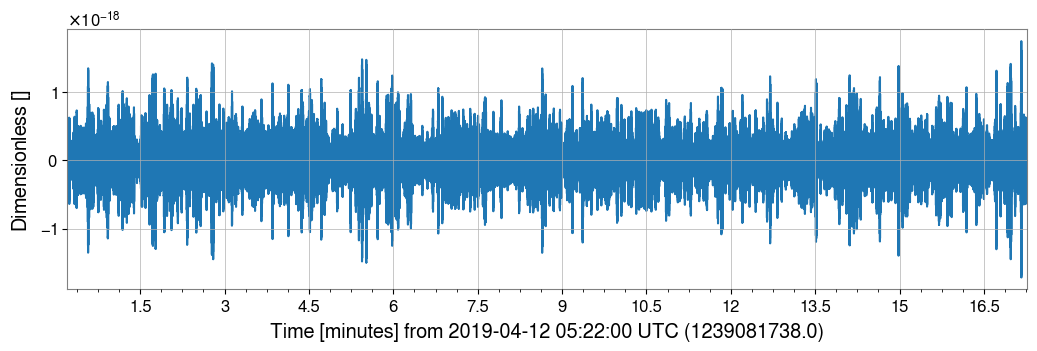

In [15]:
plot=livingston.plot()

In [16]:
hanford=TimeSeries.fetch_open_data('H1',*segment)
virgo=TimeSeries.fetch_open_data('V1',*segment)

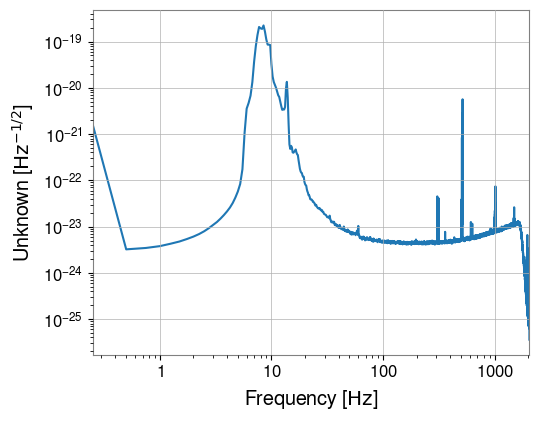

In [23]:
# Calculate ASD by repeated FFTs

asd=livingston.asd(fftlength=4,method='median',window='hann')
plot=asd.plot()

In [18]:
h_asd=hanford.asd(fftlength=4,method='median',window='hann')
v_asd=virgo.asd(fftlength=4,method='median',window='hann')

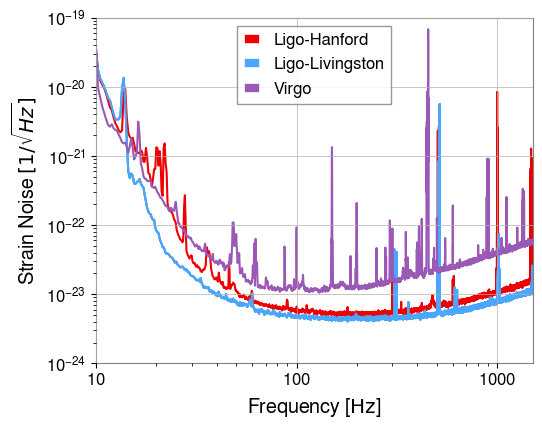

In [24]:
ax=plot.gca()
ax.plot(h_asd,label='Ligo-Hanford',color='gwpy:ligo-hanford')
ax.plot(asd,label='Ligo-Livingston',color='gwpy:ligo-livingston')
ax.plot(v_asd,label='Virgo',color='gwpy:virgo')

ax.set_ylabel(r'Strain Noise $[1/\sqrt{Hz}]$')
ax.legend()
ax.set_xlim(10,1500)
ax.set_ylim(1e-24,1e-19)
plot

## SPECTROGRAMS AND Q-TRANSFORMS

In [40]:
segment=(int(gps)-30,int(gps)+2)
livingston=TimeSeries.fetch_open_data('L1',*segment)
hanford=TimeSeries.fetch_open_data('H1',*segment)

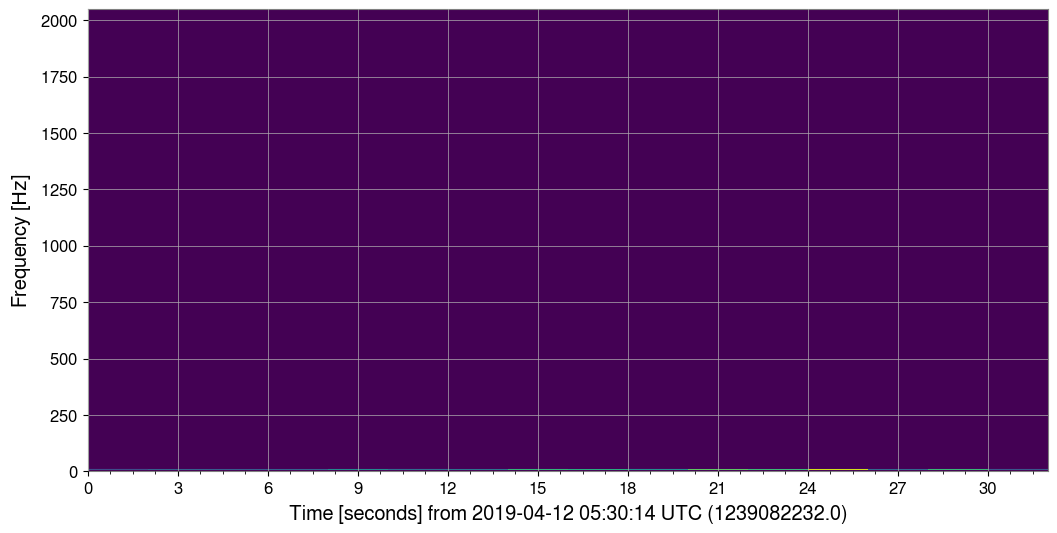

In [41]:
specgram=livingston.spectrogram(stride=2, window='hann')**(1/2.)
plot=specgram.plot()

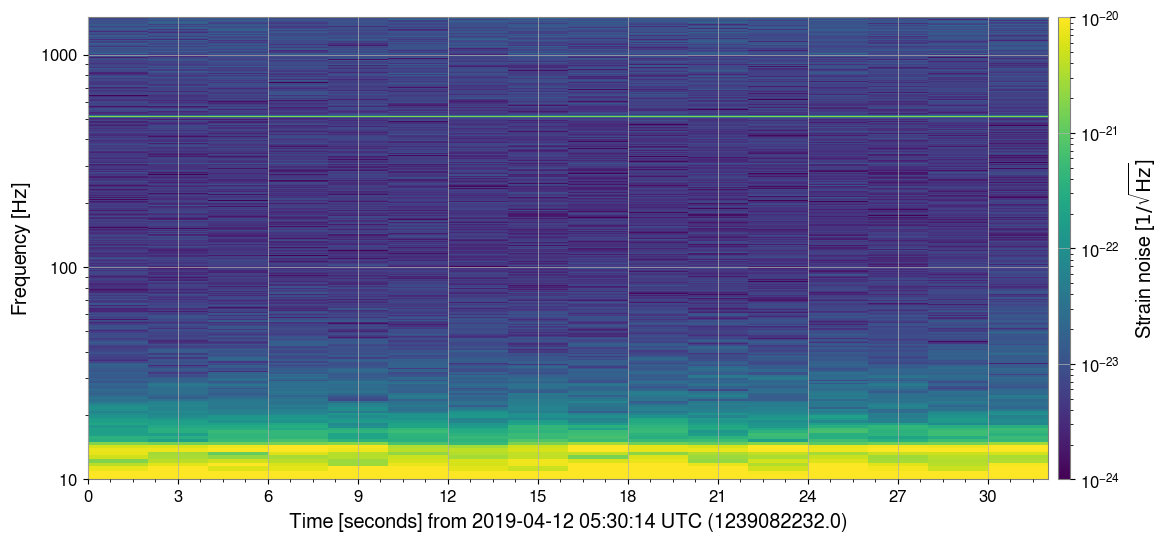

In [42]:
ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(10, 1500)
ax.colorbar(
    clim=(1e-24, 1e-20),
    norm="log",
    label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",
)
plot

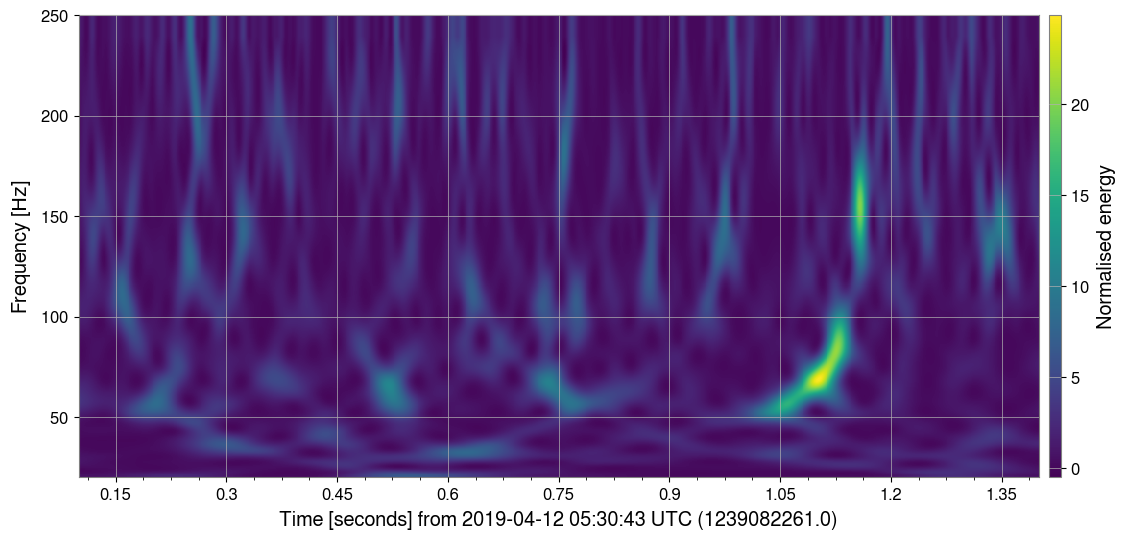

In [66]:
hq = hanford.q_transform(frange=(20,250),outseg=(gps-1,gps+0.3))
plot = hq.plot()
plot.colorbar(label="Normalised energy")

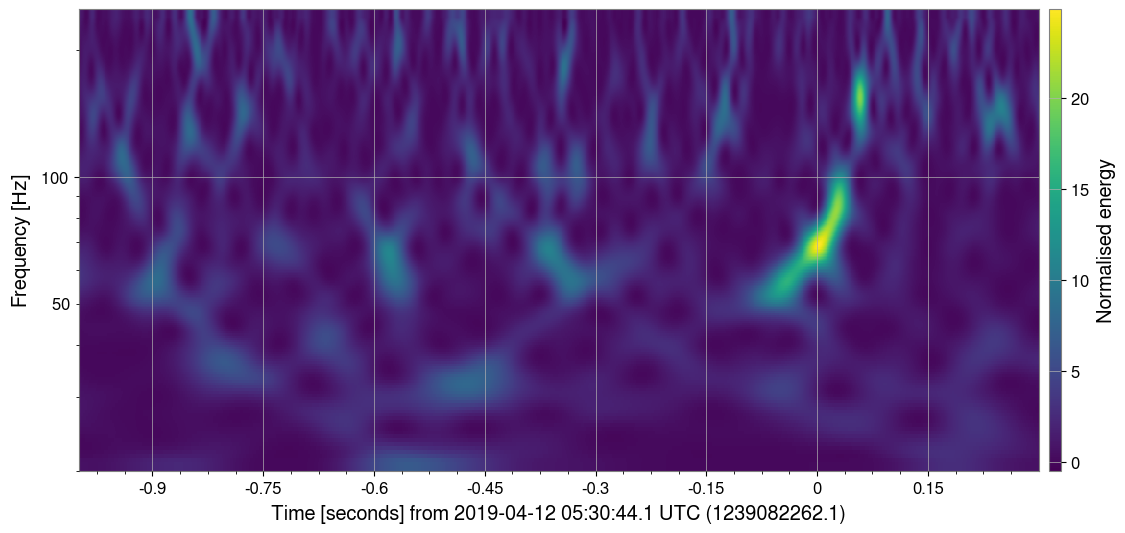

In [67]:
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')
plot

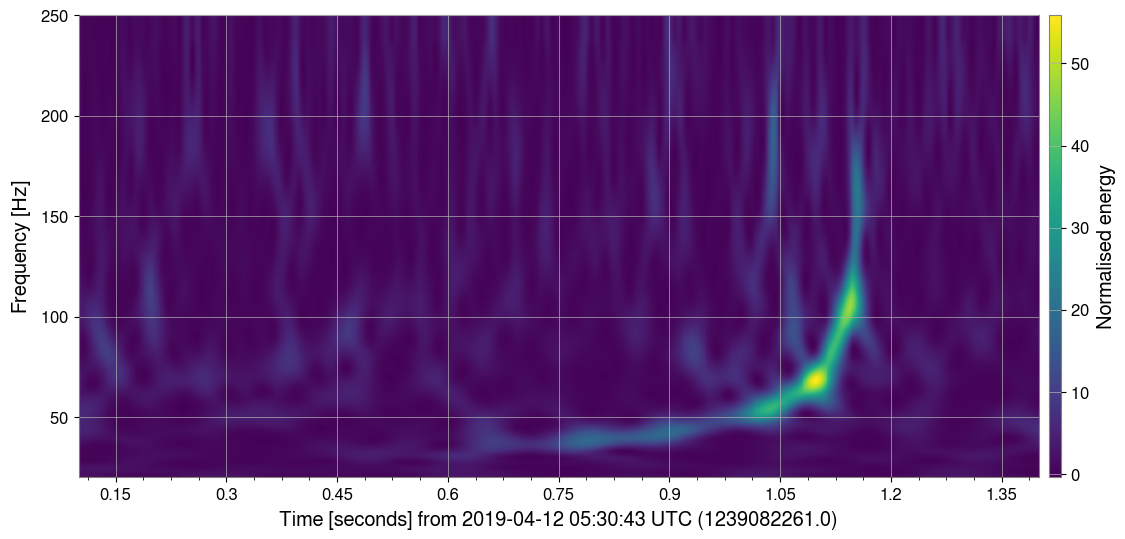

In [68]:
lq = livingston.q_transform(frange=(20,250),outseg=(gps-1,gps+0.3))
plot = lq.plot()
plot.colorbar(label="Normalised energy")

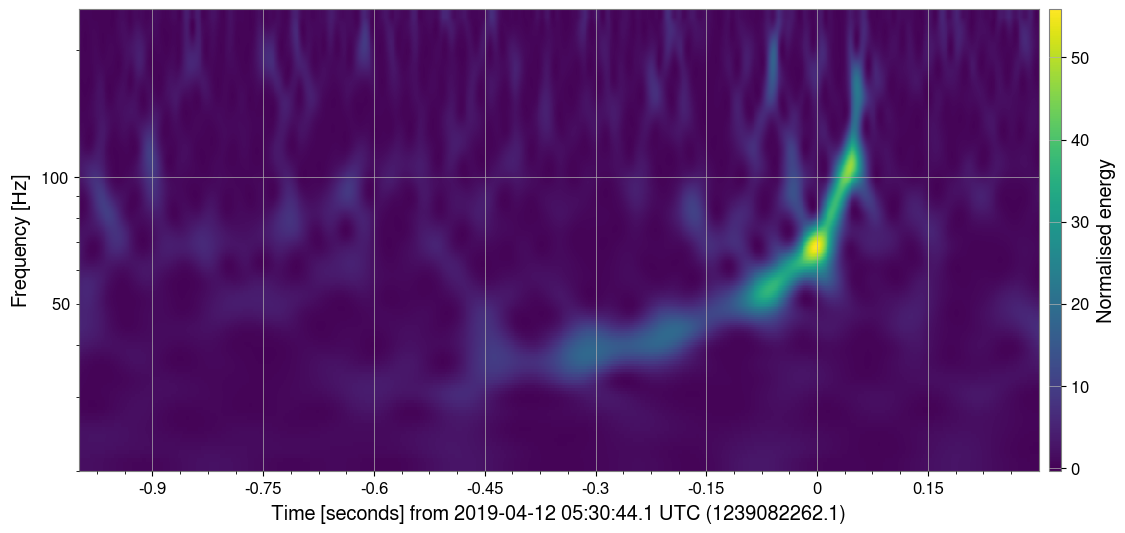

In [69]:
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')
plot